# Drawing algorithm
### fruchterman_reingold https://gist.github.com/mmisono/8972731

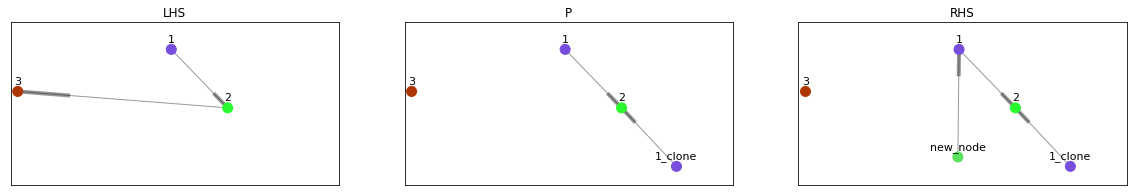

In [1]:
from rules import Rule
from plotting_fruchRe import plot_rule
import primitives
import networkx as nx

# Define the left-hand side of the rule
lhs = nx.DiGraph()
primitives.add_nodes_from(lhs, [1, 2, 3])
primitives.add_edges_from(lhs, [(1, 2), (2, 3)])

# Define the preserved part of the rule
p = nx.DiGraph()
primitives.add_nodes_from(p, [1, "1_clone", 2, 3])
primitives.add_edges_from(p, [(1, 2), ("1_clone", 2)])

# Define the right-hand side of the rule
rhs = nx.DiGraph()
primitives.add_nodes_from(rhs, [1, "1_clone", 2, 3, "new_node"])
primitives.add_edges_from(rhs, [(1, 2), ("1_clone", 2), ("new_node", 1)])

p_lhs = {1: 1, "1_clone": 1, 2: 2, 3: 3}
p_rhs = {1: 1, "1_clone": 1, 2: 2, 3: 3}

# Initialize a rule object
rule1 = Rule(p, lhs, rhs, p_lhs)

plot_rule(rule1)


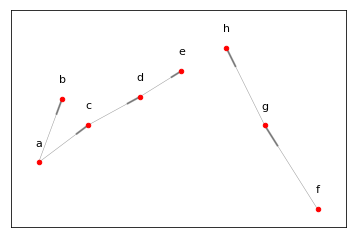

In [6]:
import plotting_fruchRe as pt
graph = nx.DiGraph()
nodes=["a", "b", "c", "d","f","e","g","h"]
edges = [("a", "b"), ("a", "c"), ("c", "d"), ("d", "e"), ("f","g"),("g","h")]
primitives.add_nodes_from(graph, nodes) 
primitives.add_edges_from(graph, edges)
pos = pt.plot_graph(graph)

In [7]:
instances = primitives.find_matching(graph, rule1.lhs)
instances

[{1: 'a', 2: 'c', 3: 'd'}, {1: 'c', 2: 'd', 3: 'e'}, {1: 'f', 2: 'g', 3: 'h'}]

In [8]:
import matplotlib.pyplot as plt
new_graph, rhs_instance,list_lhs, list_rhs = rule1.apply_to(graph, instances[0])


#pt.plot_graph(new_graph_left)
#pt.plot_graph(graph)
#pt.plot_graph(new_graph)

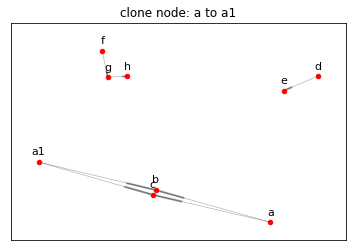

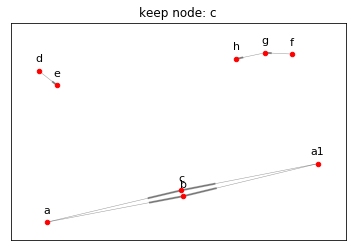

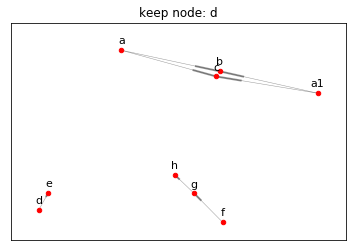

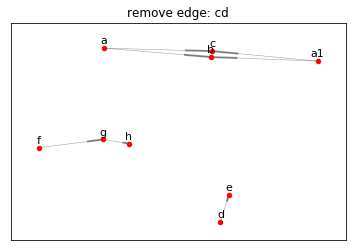

In [12]:
pt.plot_stage(list_lhs)

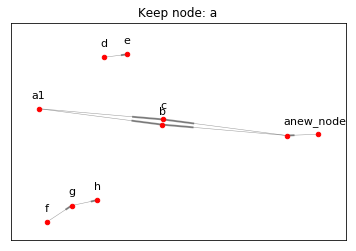

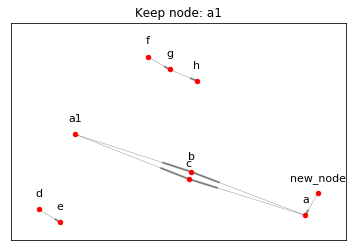

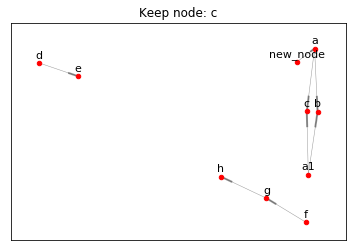

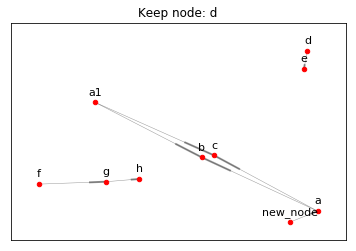

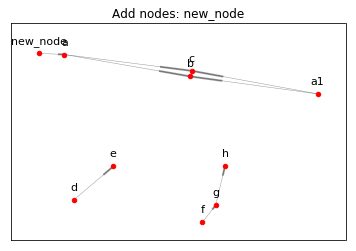

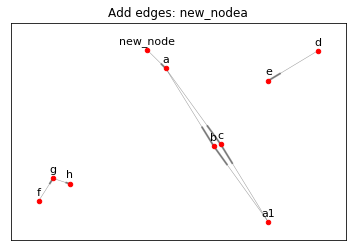

In [10]:
pt.plot_stage(list_rhs)

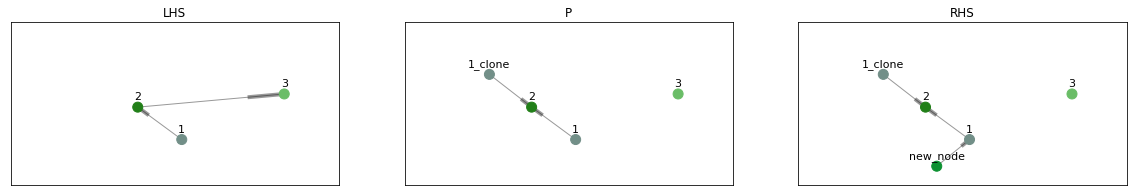

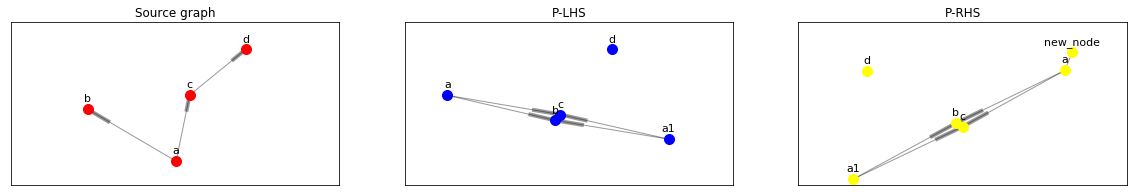

In [11]:
import matplotlib.pyplot as plt
plt.clf()
plot_rule(rule1)
pt.plot_process(graph,new_graph_left, new_graph)

### random graph


In [4]:
import plotting_fruchRe as pt
n10 = nx.erdos_renyi_graph(10,0.1,seed = 123, directed = True)
instances = primitives.find_matching(n10, rule1.lhs)
new_graph, rhs_instance,list_lhs, list_rhs = rule1.apply_to(n10, instances[0])


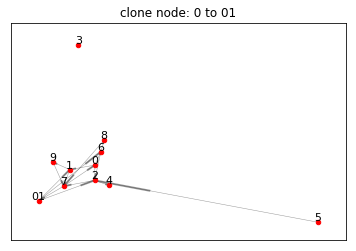

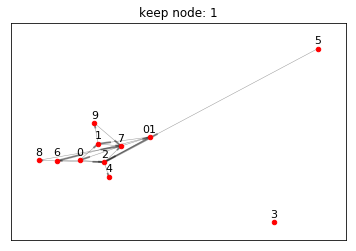

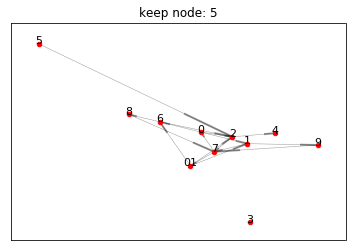

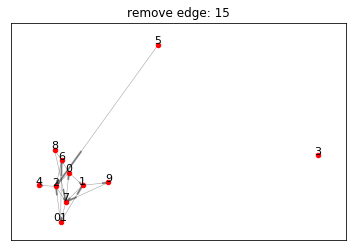

In [7]:
forceatlas2_1=pt.ForceAtlas2_get_parameters(verbose=False)
pt.plot_stage(list_lhs,forceatlas2_1)

## ForceAtlas2
### https://github.com/bhargavchippada/forceatlas2

### initial testing

100%|██████████| 2000/2000 [00:00<00:00, 56895.83it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


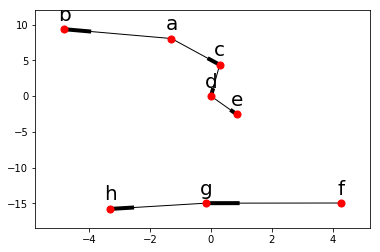

In [13]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import primitives
import copy
import numpy as np

graph = nx.DiGraph()
nodes=["a", "b", "c", "d","f","e","g","h"]
edges = [("a", "b"), ("a", "c"), ("c", "d"), ("d", "e"), ("f","g"),("g","h")]
primitives.add_nodes_from(graph, nodes) 
primitives.add_edges_from(graph, edges)

forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(graph, pos=None, iterations=2000)
#nx.draw_networkx_nodes(graph,positions)
#nx.draw_networkx_edges(graph,positions)
nx.draw_networkx(graph, positions, cmap=plt.get_cmap('jet'), node_size=50, with_labels=False)

labels = {}
for node in graph.nodes():
    labels[node] = str(node)

offset = 2
labels_pos = copy.deepcopy(positions)

for p in positions:  # raise text positions
    labels_pos[p] = list(labels_pos[p])
    labels_pos[p][1] =  labels_pos[p][1] + offset
nx.draw_networkx_labels(graph, labels_pos, labels, font_size=20)









plt.show()

### official testing

In [1]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import primitives
import copy
import numpy as np

graph = nx.DiGraph()
nodes=["a", "b", "c", "d","f","e","g","h"]
edges = [("a", "b"), ("a", "c"), ("c", "d"), ("d", "e"), ("f","g"),("g","h")]
primitives.add_nodes_from(graph, nodes) 
primitives.add_edges_from(graph, edges)

from rules import Rule
from plotting_fruchRe import plot_rule
import primitives
import networkx as nx

# Define the left-hand side of the rule
lhs = nx.DiGraph()
primitives.add_nodes_from(lhs, [1, 2, 3])
primitives.add_edges_from(lhs, [(1, 2), (2, 3)])

# Define the preserved part of the rule
p = nx.DiGraph()
primitives.add_nodes_from(p, [1, "1_clone", 2, 3])
primitives.add_edges_from(p, [(1, 2), ("1_clone", 2)])

# Define the right-hand side of the rule
rhs = nx.DiGraph()
primitives.add_nodes_from(rhs, [1, "1_clone", 2, 3, "new_node"])
primitives.add_edges_from(rhs, [(1, 2), ("1_clone", 2), ("new_node", 1)])

p_lhs = {1: 1, "1_clone": 1, 2: 2, 3: 3}
p_rhs = {1: 1, "1_clone": 1, 2: 2, 3: 3}

# Initialize a rule object
rule1 = Rule(p, lhs, rhs, p_lhs)

instances = primitives.find_matching(graph, rule1.lhs)

new_graph, rhs_instance,list_lhs, list_rhs = rule1.apply_to(graph, instances[0])

print("successfully running")

successfully running


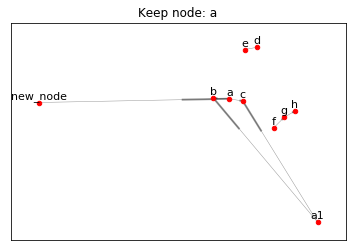

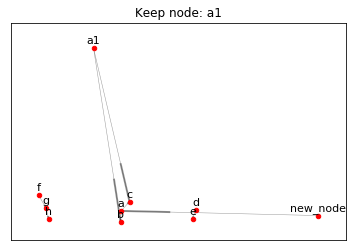

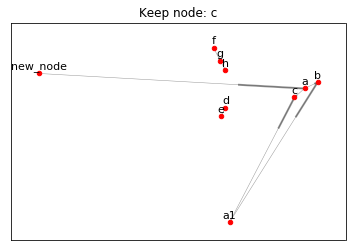

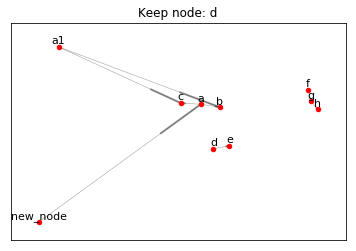

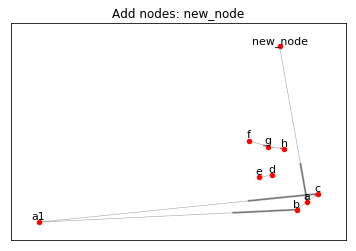

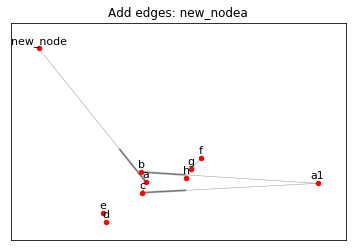

In [2]:
import plotting_fruchRe as pt
forceatlas2_1=pt.ForceAtlas2_get_parameters(verbose=False)
pt.plot_stage(list_rhs,forceatlas2_1)